# Genetic Algorithm for Continuous Function Optimization

https://machinelearningmastery.com/simple-genetic-algorithm-from-scratch-in-python/

Example: 

$(x_1^2, x_2^2)$ __minimization__ function.

Takes input variables $x_1$ and $x_2$ 

Has an optima (minimum) at  f(0, 0) = 0.0

In [27]:
import numpy as np
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline

Define an objective / fitness function to be minimised.

In [28]:
# objective function
def objective(x):
    """ the function to minimize """
    return x[0]**2.0 + x[1]**2.0

In [29]:
def decode(bounds, n_bits, bitstring):
    """
    decode bitstring to numbers 
    i.e. bitstring value to range of numbers within the bounds specified
    """
    
    decoded = []
    
    #print('bitstring', bitstring)
    
    largest = 2**n_bits # max possible value of 16 bit number 
    
    for i in range(len(bounds)):                     # each of the two vars 
        
        start, end = i * n_bits, (i * n_bits)+n_bits # start index, stop index each var
        
        substring = bitstring[start:end]             # extract sub-string using start, stop value
        
        chars = ''.join([str(s) for s in substring]) # convert bitstring to a string of chars
        
        #print('chars', chars)
        
        integer = int(chars, 2)                      # convert string to integer, using base 2
        
        value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0]) # map to desired range
        
        decoded.append(value)                        # store
        
    return decoded

In [30]:
def selection(pop, scores, k=3):
    """
    tournament selection
    
    """
    sample_idxs = randint(0, len(pop), k)       # select k random indexes for individuals to sample
    
    sample = [scores[i] for i in sample_idxs]   # score of each individual
    
    best_sample_idx = np.argmin(sample)         # ID of best score in sample (tournament)
    
    best_pop_idx = sample_idxs[best_sample_idx] # population ID of best score in sample
    
    return pop[best_pop_idx]                    # return best individual in tournament

In [31]:
def crossover(p1, p2, r_cross):
    """
    crossover two parents to create two children
    """
    c1, c2 = p1.copy(), p2.copy()    # children are copies of parents by default
    
    if rand() < r_cross:             # decide whether to cross
        
        pt = randint(1, len(p1)-2)   # select crossover point that is not on either end of the string
        
        c1 = p1[:pt] + p2[pt:]       # perform crossover
        c2 = p2[:pt] + p1[pt:]
        
    return [c1, c2]

In [35]:
def mutation(bitstring, r_mut):
    """
    mutation operator
    """
    for i in range(len(bitstring)):
        
        if rand() < r_mut:                     # decide whether to mutate
            
            bitstring[i] = 1 - bitstring[i]    # flip the bit
            
    return bitstring

In [36]:
# genetic algorithm
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut, bounds):
    
    """
    Minimises objective function, for numbers in the range indictaed by the bounds, represented by bit strings of length n_bits.
    """
    
    # initial population of random bitstring individuals
    # bitstring can be made from Boolean values True and False, string values ‘0’ and ‘1’, or integer values 0 and 1 
    pop = [randint(0, 2, n_bits*n_vars).tolist() for _ in range(n_pop)]
    
    #print(np.matrix(pop))
    
    # initiailse list to store best solution each round
    best_log = []  
    

    # initialise variables that update when new best found to track best overall solution
    best_gen, best_score, best_sol = 0, objective(decode(bounds,  
                                                         n_bits, 
                                                         pop[0])), pop[0] 
    
    
    for gen in range(n_iter):                              # cycle through each generation
          
        decoded = [decode(bounds, n_bits, p) for p in pop] # decode population to real numbers
        
        scores = [objective(c) for c in decoded]           # evaluate all chromosomes in the population
        
        best = min(scores)                                 # choose the best chromosome
        
        best_ID = np.argmin(scores)                        # find its position in the list 
        
        best_log.append(best)                              # store best solution this round
        
        
        if best < best_score:                              # if new best found, update vars and print msg
            best_gen = gen
            best_score = best
            best_sol = pop[best_ID]          
            print(f"Gen {gen}, best score = {round(best,4)}, values = {decoded[best_ID]}")
        
        
        # select parents:
        # run tournament selection n_pop times to get n_pop winners (population size does not change)
        selected = [selection(pop, scores) for _ in range(n_pop)] 
        
        # create the next generation
        children = []
        
        for i in range(0, n_pop, 2):             # select parents in pairs
            p1, p2 = selected[i], selected[i+1]
            
            for c in crossover(p1, p2, r_cross): # crossover each pair to give two children
                
                c = mutation(c, r_mut)               # mutate each child
                
                children.append(c)               # store for next generation
                
        
        # replace population
        pop = children
        
    return best, best_log, best_gen, best_score, best_sol





Gen 0, best score = 0.5021, values = [0.0018310546875, -0.7086181640625]
Gen 1, best score = 0.1943, values = [0.41748046875, -0.141448974609375]
Gen 3, best score = 0.0175, values = [0.0445556640625, -0.124664306640625]
Gen 4, best score = 0.0063, values = [0.015106201171875, -0.078125]
Gen 5, best score = 0.0008, values = [0.015106201171875, -0.024261474609375]
Gen 7, best score = 0.0003, values = [0.010986328125, -0.01220703125]
Gen 8, best score = 0.0002, values = [0.011138916015625, -0.009918212890625]
Gen 13, best score = 0.0, values = [0.00152587890625, -0.0048828125]
Gen 16, best score = 0.0, values = [0.00152587890625, -0.001373291015625]
Gen 17, best score = 0.0, values = [0.000457763671875, -0.001678466796875]
Gen 18, best score = 0.0, values = [0.00152587890625, -0.000457763671875]
Gen 24, best score = 0.0, values = [0.001373291015625, -0.0006103515625]
Gen 26, best score = 0.0, values = [0.0, -0.001068115234375]
Gen 27, best score = 0.0, values = [0.00030517578125, -0.0009

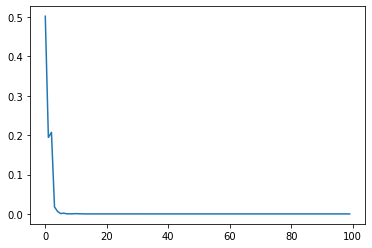

In [37]:
bounds = [[-5.0, 5.0], # define range for input variables
          [-5.0, 5.0]] 

n_vars = len(bounds)   # number of variables

n_bits = 16            # 16 bit number (bit string will have n_bits * n_vars)

n_iter = 100           # total iterations

n_pop = 100            # define the population size

r_cross = 0.9          # crossover rate

r_mut = 1.0 / (float(n_bits) * len(bounds)) # mutation rate

# perform the genetic algorithm search
best, best_log, best_gen, best_score, best_sol = genetic_algorithm(objective, n_bits, 
                                                                   n_iter, n_pop, r_cross, 
                                                                   r_mut, bounds)
# print(best, best_gen, best_score, best_sol)

plt.plot(best_log)